# Table of Contents
 <p><div class="lev1"><a href="#Marvel-Comics-Social-Network"><span class="toc-item-num">1&nbsp;&nbsp;</span>Marvel Comics Social Network</a></div><div class="lev2"><a href="#Network-Visualization"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Network Visualization</a></div><div class="lev2"><a href="#Application-of-Spectral-Clustering-and-Quantum-Transport-Clustering"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Application of Spectral Clustering and Quantum Transport Clustering</a></div><div class="lev3"><a href="#Eigenvalues-of-graph-Laplacian:-there-exists-3-low-energy-states"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Eigenvalues of graph Laplacian: there exists 3 low energy states</a></div><div class="lev3"><a href="#Representative-nodes-and-weights"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Representative nodes and weights</a></div><div class="lev3"><a href="#Spectral-Clustering-Result"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Spectral Clustering Result</a></div><div class="lev3"><a href="#Quantum-Transport-Clustering-Result"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Quantum Transport Clustering Result</a></div><div class="lev4"><a href="#Most-popular-vote"><span class="toc-item-num">1.2.4.1&nbsp;&nbsp;</span>Most popular vote</a></div><div class="lev4"><a href="#Second-most-popular-vote"><span class="toc-item-num">1.2.4.2&nbsp;&nbsp;</span>Second most popular vote</a></div><div class="lev3"><a href="#Comparison-between-adjacency-matrix-and-consensus-matrix"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Comparison between adjacency matrix and consensus matrix</a></div>

# Marvel Comics Social Network

In this demo, we will illustrate the additional advantage of quantum transport clustering (QTC) compared to traditional spectral clustering (SC) through a realistic network data set which is not embedded in a Euclidean space.

In [1]:
import quantum_transport_clustering as qtc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## Loading Data

Each row in the data set indicates the **co-occurence** of the two characters in an issue of Marval Comics. We will use the count of co-occurence as a measure of similarity between each pair of characters in the Marvel Comics Universe.

In [2]:
data_ = pd.read_csv("./marvel_character_network.csv", delimiter=',', header=0)
data_.head(5)

,0,1
0,IRON MAN IV/JAMES R.,IRON MAN/TONY STARK
1,IRON MAN IV/JAMES R.,IRON MAN/TONY STARK
2,MYSTIQUE/RAVEN DARKH,PYRO/ALLERDYCE JOHNN
3,MYSTIQUE/RAVEN DARKH,ROGUE /
4,ROGUE /,PYRO/ALLERDYCE JOHNN


The data can be found at [github](http://syntagmatic.github.io/exposedata/marvel/) with additional descriptions at [kaggle](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network).


Next, we focus on three popular subsets of Marvel characters (heros and their foes).

In [3]:
avengers_ = ['CAPTAIN AMERICA', 'SPIDER-MAN/PETER PAR', 'IRON MAN/TONY STARK ', 'THOR/DR. DONALD BLAK',
            'SCARLET WITCH/WANDA ', 'VISION ', 'HAWK', 'WASP/JANET VAN DYNE ', 'HULK/DR. ROBERT BRUC',
            "ANT-MAN II/SCOTT HAR", 'ANT-MAN/DR. HENRY J.', 'DR. STRANGE/STEPHEN ',  'JARVIS, EDWIN ', 'BLACK WIDOW/NATASHA ',
            'FURY, COL. NICHOLAS ', "BLACK PANTHER/T'CHAL", 'IRON MAN IV/JAMES R.', 'FALCON/SAM WILSON', 
            "CAPTAIN MARVEL/CAPTA",  "QUICKSILVER/PIETRO M",
             "BUCKY/BUCKY BARNES", "ULTRON", "MANDARIN", "CARTER, PEGGY", "CARTER, SHARON"]
xmen_ = ["WOLVERINE/LOGAN ", "BEAST/HENRY &HANK& P", "CYCLOPS/SCOTT SUMMER", "STORM/ORORO MUNROE S", "COLOSSUS II/PETER RA",
        "PROFESSOR X/CHARLES ", "MARVEL GIRL/JEAN GRE", "ANGEL/WARREN KENNETH", "ICEMAN/ROBERT BOBBY ", "NIGHTCRAWLER/KURT WA",
        "ROGUE /", "PSYLOCKE/ELISABETH B", "GAMBIT/REMY LEBEAU ", "BANSHEE/SEAN CASSIDY", "JUBILEE/JUBILATION L", 
         "SUNSPOT/ROBERTO DACO", "MAGNETO/MAGNUS/ERIC ", "MYSTIQUE/RAVEN DARKH", "APOCALYPSE/EN SABAH ","CALIBAN/", "PYRO/ALLERDYCE JOHNN"]
asgardians_ = ["ODIN [ASGARDIAN]", "BALDER [ASGARDIAN]", "HOGUN [ASGARDIAN]", "FANDRAL [ASGARDIAN]", "SIF", "HEIMDALL [ASGARDIAN]",
               "LOKI [ASGARDIAN]", "HELA [ASGARDIAN]", "EXECUTIONER II/SKURG"]

all_characters_ = avengers_ + asgardians_ + xmen_
n_heros = len(all_characters_)

In [4]:
hero2idx_ = dict(zip(all_characters_, range(n_heros)))

In [5]:
adj_map_ = np.zeros([n_heros]*2)
for idx in range(data_.shape[0]):
    h1, h2 = data_.iloc[idx,:] # read each line of the data table
    adj_map_[hero2idx_[h1], hero2idx_[h2]] += 1
adj_map_ += adj_map_.T

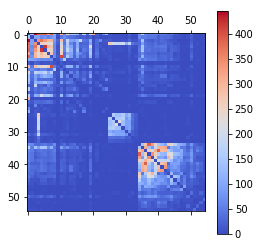

In [6]:
adj_ = adj_map_ - np.diag(adj_map_.diagonal()) # remove narcissism
plt.matshow(adj_, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

## Network Visualization

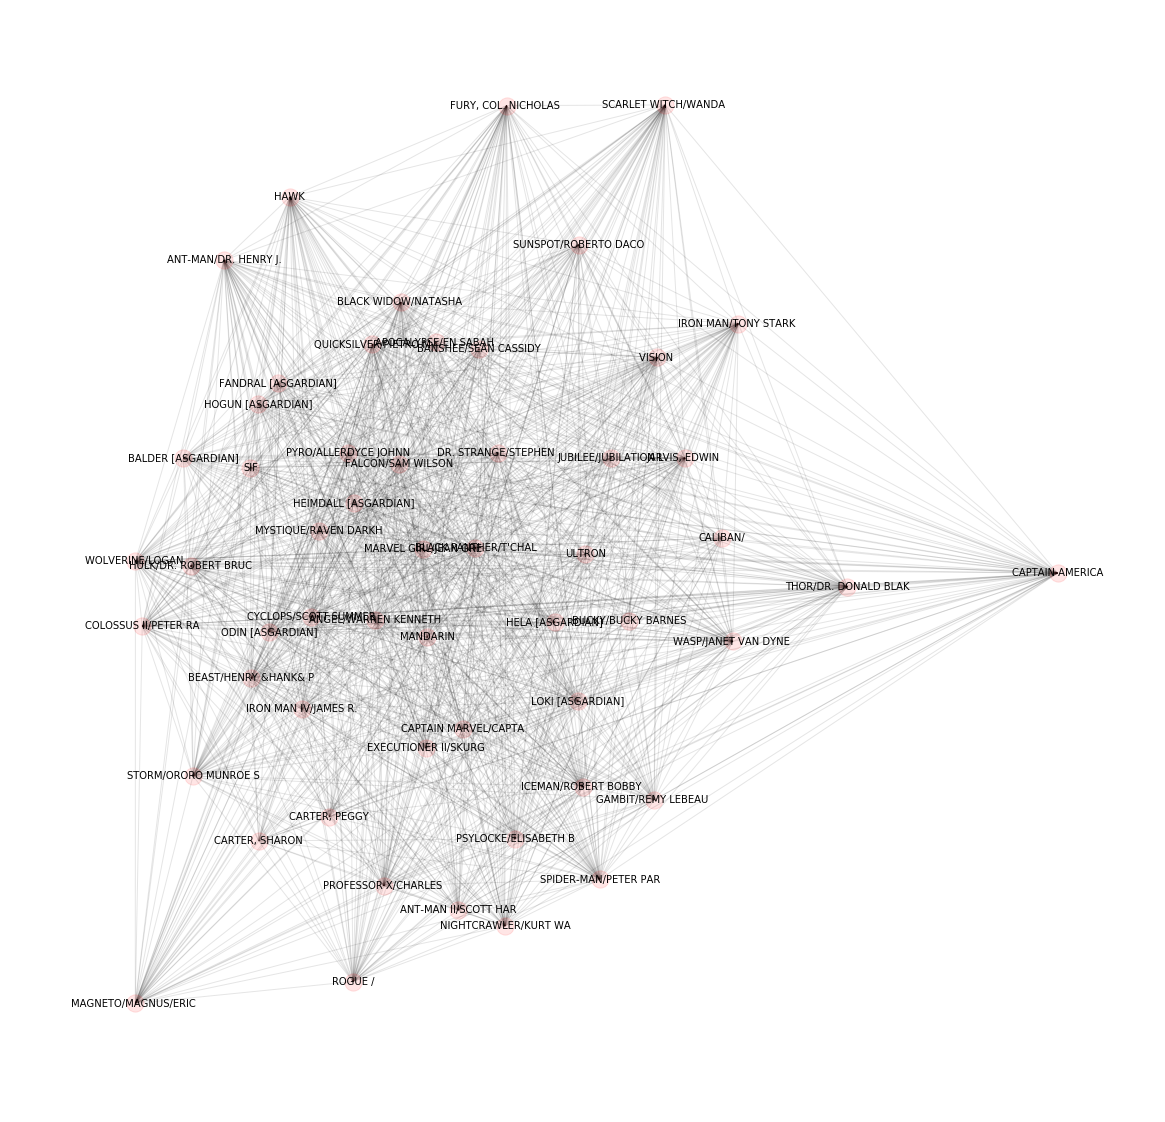

In [7]:
idx2hero_ = dict(zip(range(n_heros), all_characters_))
G = nx.from_numpy_array(adj_)
plt.figure(figsize=(20,20))

pos = nx.kamada_kawai_layout(G)
labels = idx2hero_
nx.draw_networkx_labels(G,pos,labels,font_size=10)
nx.draw(G, pos, alpha=0.1)

Note that the Marval characters are highly social people, since they also interact with characters outside their usual social circles.

## Application of Spectral Clustering and Quantum Transport Clustering

In [8]:
graph_ = qtc.GraphMethods(adj_, graph_embedded=False)

> Initial parameters: graph is not embedded in Euclidean space
>> Graph Laplacian done


In [9]:
spec = qtc.SpectralClustering(n_clusters=3)
spec.fit(graph_.Lap_)

> Initialization parameters: n_cluster=3
> Row normalized spectral embedding.
> Exact eigs done


In [24]:
shot = qtc.QuantumTransportClustering(s=1, n_clusters=3, Hamiltonian=graph_.Lap_, n_eigs=None)
# shot.Grind(grind='fine', method_='kmeans')
_ = shot.Grind(grind='fine', method='kmeans')

> Initialization parameters: n_cluster=3
> Laplace variable s = 1
> First 55 primes generated
>> Espresso: direct extraction method
>> Coldbrew: consensus matrix method
> Exact eigs done
> fine-ground: 55 initialization nodes


### Eigenvalues of graph Laplacian: there exists 3 low energy states

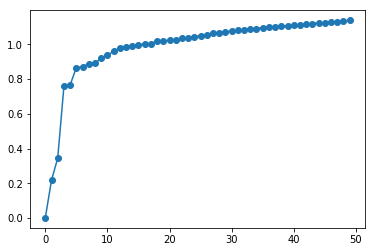

In [25]:
plt.plot(shot.Heigval[:50], '-o')
plt.show()

In [12]:
shot.Espresso()
shot.Coldbrew()

### Representative nodes and weights

In [13]:
nodes_, weights_ = shot.double_shot_
for idx in range(5):
    print("{}: {}".format(nodes_[idx], round(weights_[idx], 3)))
print("   .\n   .\n   .")

16: 0.255
15: 0.109
17: 0.018
14: 0.018
13: 0.018
   .
   .
   .


### Spectral Clustering Result

In [14]:
for l in range(3):
    print(*np.array(all_characters_)[spec.labels_ == l])
    print('\n')

CAPTAIN AMERICA SPIDER-MAN/PETER PAR IRON MAN/TONY STARK  SCARLET WITCH/WANDA  VISION  HAWK WASP/JANET VAN DYNE  HULK/DR. ROBERT BRUC ANT-MAN II/SCOTT HAR ANT-MAN/DR. HENRY J. DR. STRANGE/STEPHEN  JARVIS, EDWIN  BLACK WIDOW/NATASHA  FURY, COL. NICHOLAS  BLACK PANTHER/T'CHAL IRON MAN IV/JAMES R. FALCON/SAM WILSON CAPTAIN MARVEL/CAPTA QUICKSILVER/PIETRO M BUCKY/BUCKY BARNES ULTRON MANDARIN CARTER, PEGGY CARTER, SHARON


THOR/DR. DONALD BLAK ODIN [ASGARDIAN] BALDER [ASGARDIAN] HOGUN [ASGARDIAN] FANDRAL [ASGARDIAN] SIF HEIMDALL [ASGARDIAN] LOKI [ASGARDIAN] HELA [ASGARDIAN] EXECUTIONER II/SKURG


WOLVERINE/LOGAN  BEAST/HENRY &HANK& P CYCLOPS/SCOTT SUMMER STORM/ORORO MUNROE S COLOSSUS II/PETER RA PROFESSOR X/CHARLES  MARVEL GIRL/JEAN GRE ANGEL/WARREN KENNETH ICEMAN/ROBERT BOBBY  NIGHTCRAWLER/KURT WA ROGUE / PSYLOCKE/ELISABETH B GAMBIT/REMY LEBEAU  BANSHEE/SEAN CASSIDY JUBILEE/JUBILATION L SUNSPOT/ROBERTO DACO MAGNETO/MAGNUS/ERIC  MYSTIQUE/RAVEN DARKH APOCALYPSE/EN SABAH  CALIBAN/ PYRO/ALLERD

### Quantum Transport Clustering Result

In [15]:
for l in range(3):
    print(*np.array(all_characters_)[shot.labels_ == l])
    print('\n')

CAPTAIN AMERICA SPIDER-MAN/PETER PAR IRON MAN/TONY STARK  THOR/DR. DONALD BLAK SCARLET WITCH/WANDA  VISION  HAWK WASP/JANET VAN DYNE  HULK/DR. ROBERT BRUC ANT-MAN II/SCOTT HAR ANT-MAN/DR. HENRY J. DR. STRANGE/STEPHEN  JARVIS, EDWIN  BLACK WIDOW/NATASHA  FURY, COL. NICHOLAS  BLACK PANTHER/T'CHAL IRON MAN IV/JAMES R. FALCON/SAM WILSON CAPTAIN MARVEL/CAPTA QUICKSILVER/PIETRO M BUCKY/BUCKY BARNES ULTRON MANDARIN CARTER, PEGGY CARTER, SHARON


WOLVERINE/LOGAN  BEAST/HENRY &HANK& P CYCLOPS/SCOTT SUMMER STORM/ORORO MUNROE S COLOSSUS II/PETER RA PROFESSOR X/CHARLES  MARVEL GIRL/JEAN GRE ANGEL/WARREN KENNETH ICEMAN/ROBERT BOBBY  NIGHTCRAWLER/KURT WA ROGUE / PSYLOCKE/ELISABETH B GAMBIT/REMY LEBEAU  BANSHEE/SEAN CASSIDY JUBILEE/JUBILATION L SUNSPOT/ROBERTO DACO MAGNETO/MAGNUS/ERIC  MYSTIQUE/RAVEN DARKH APOCALYPSE/EN SABAH  CALIBAN/ PYRO/ALLERDYCE JOHNN


ODIN [ASGARDIAN] BALDER [ASGARDIAN] HOGUN [ASGARDIAN] FANDRAL [ASGARDIAN] SIF HEIMDALL [ASGARDIAN] LOKI [ASGARDIAN] HELA [ASGARDIAN] EXECUTIONER

#### Most popular vote

In [16]:
for l in range(3):
    print(*np.array(all_characters_)[shot.Omega_[:,16] == l])
    print('\n')

CAPTAIN AMERICA SPIDER-MAN/PETER PAR IRON MAN/TONY STARK  THOR/DR. DONALD BLAK SCARLET WITCH/WANDA  VISION  HAWK WASP/JANET VAN DYNE  HULK/DR. ROBERT BRUC ANT-MAN II/SCOTT HAR ANT-MAN/DR. HENRY J. DR. STRANGE/STEPHEN  JARVIS, EDWIN  BLACK WIDOW/NATASHA  FURY, COL. NICHOLAS  BLACK PANTHER/T'CHAL IRON MAN IV/JAMES R. FALCON/SAM WILSON CAPTAIN MARVEL/CAPTA QUICKSILVER/PIETRO M BUCKY/BUCKY BARNES ULTRON MANDARIN CARTER, PEGGY CARTER, SHARON


WOLVERINE/LOGAN  BEAST/HENRY &HANK& P CYCLOPS/SCOTT SUMMER STORM/ORORO MUNROE S COLOSSUS II/PETER RA PROFESSOR X/CHARLES  MARVEL GIRL/JEAN GRE ANGEL/WARREN KENNETH ICEMAN/ROBERT BOBBY  NIGHTCRAWLER/KURT WA ROGUE / PSYLOCKE/ELISABETH B GAMBIT/REMY LEBEAU  BANSHEE/SEAN CASSIDY JUBILEE/JUBILATION L SUNSPOT/ROBERTO DACO MAGNETO/MAGNUS/ERIC  MYSTIQUE/RAVEN DARKH APOCALYPSE/EN SABAH  CALIBAN/ PYRO/ALLERDYCE JOHNN


ODIN [ASGARDIAN] BALDER [ASGARDIAN] HOGUN [ASGARDIAN] FANDRAL [ASGARDIAN] SIF HEIMDALL [ASGARDIAN] LOKI [ASGARDIAN] HELA [ASGARDIAN] EXECUTIONER

#### Second most popular vote

In [17]:
for l in range(3):
    print(*np.array(all_characters_)[shot.Omega_[:,15] == l])
    print('\n')

WOLVERINE/LOGAN  BEAST/HENRY &HANK& P CYCLOPS/SCOTT SUMMER STORM/ORORO MUNROE S COLOSSUS II/PETER RA PROFESSOR X/CHARLES  MARVEL GIRL/JEAN GRE ANGEL/WARREN KENNETH ICEMAN/ROBERT BOBBY  NIGHTCRAWLER/KURT WA ROGUE / PSYLOCKE/ELISABETH B GAMBIT/REMY LEBEAU  BANSHEE/SEAN CASSIDY JUBILEE/JUBILATION L MAGNETO/MAGNUS/ERIC  MYSTIQUE/RAVEN DARKH APOCALYPSE/EN SABAH  CALIBAN/


THOR/DR. DONALD BLAK ODIN [ASGARDIAN] BALDER [ASGARDIAN] HOGUN [ASGARDIAN] FANDRAL [ASGARDIAN] SIF HEIMDALL [ASGARDIAN] LOKI [ASGARDIAN] HELA [ASGARDIAN] EXECUTIONER II/SKURG


CAPTAIN AMERICA SPIDER-MAN/PETER PAR IRON MAN/TONY STARK  SCARLET WITCH/WANDA  VISION  HAWK WASP/JANET VAN DYNE  HULK/DR. ROBERT BRUC ANT-MAN II/SCOTT HAR ANT-MAN/DR. HENRY J. DR. STRANGE/STEPHEN  JARVIS, EDWIN  BLACK WIDOW/NATASHA  FURY, COL. NICHOLAS  BLACK PANTHER/T'CHAL IRON MAN IV/JAMES R. FALCON/SAM WILSON CAPTAIN MARVEL/CAPTA QUICKSILVER/PIETRO M BUCKY/BUCKY BARNES ULTRON MANDARIN CARTER, PEGGY CARTER, SHARON SUNSPOT/ROBERTO DACO PYRO/ALLERD

The difference between the most popular vote and second most popular vote is whether "Thor" belongs to Avengers cluster or Asgardians cluster.

### Comparison between adjacency matrix and consensus matrix

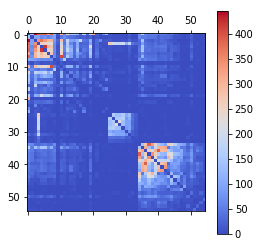

In [18]:
plt.matshow(adj_, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

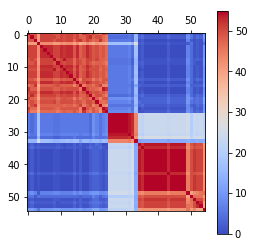

In [19]:
plt.matshow(shot.consensus_matrix_, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

The 3 blocks correspond to Avengers, Asgardians, and X-Men.

## Compare and Contrast

Both Spectral Clustering (SC) and Quantum Transport Clustering (QTC) used the same *graph Laplacian* and its eigenvectors.
Both SC and QTC gave reasonable clustering results.

However, SC returned a **unique** clustering whereas QTC gave an **ensemble** of clusterings. In particular, the two popular votes reflected the fact that Thor often hangs out with both the Avengers and his home world characters. Through the number of votes, we can also get a sense of which senario is more likely (25.5 vs 10.9). The existance of popular votes and three low energy states also indicated that the QTC was performing as expected. In addition, we can also utilize the minority votes by summarizing all the votes into a **consensus matrix**, which can be used to visualize the refined similarity relations between nodes, or as an input of other clustering algorithms, such as hierarchical clustering and SC.

Even though both SC and QTC gave correct partitions of a social network, with the latter, we are able to gain additional insights into the data set and confidence about the QTC result.